In [121]:
import pandas as pd
import networkx as nx

In [104]:
pd.read_csv('summary.csv', parse_dates=True)

,statistic,value
0,number-of-commits,119
1,number-of-entities,105
2,number-of-entities-changed,435
3,number-of-authors,3


In [34]:
authors_churn = pd.read_csv('author-churn.csv')

In [42]:
authors_churn

,author,added,deleted
0,Brian Hicks,4081,1705
1,Daniel Krawczyk,1285,772
2,Tomasz Janiszewski,4034,2401


In [ ]:
authors = pd.read_csv('authors.csv')

In [41]:
authors.head()

,entity,n-authors,n-revs
0,main.go,3,31
1,web.go,3,29
2,README.md,3,26
3,marathon/marathon.go,3,22
4,web_test.go,3,19


In [43]:
authors.describe()

,n-authors,n-revs
count,105.000000,105.000000
mean,1.514286,4.142857
std,0.735295,5.570231
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,5.000000
max,3.000000,31.000000


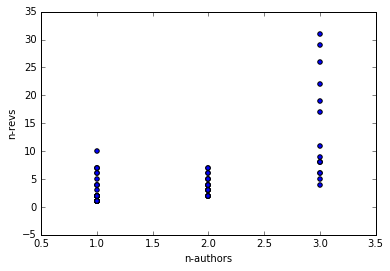

In [24]:
%matplotlib inline
authors.plot(kind='scatter', x='n-authors', y='n-revs');

In [32]:
authors.groupby('n-authors').describe()

n-revs
n-authors                 
1         count  66.000000
          mean    2.045455
          std     1.884608
          min     1.000000
          25%     1.000000
          50%     1.000000
          75%     2.000000
          max    10.000000
2         count  24.000000
          mean    3.791667
          std     1.587428
          min     2.000000
          25%     2.750000
          50%     3.500000
          75%     5.000000
          max     7.000000
3         count  15.000000
          mean   13.933333
          std     9.284908
          min     4.000000
          25%     7.000000
          50%     9.000000
          75%    20.500000
          max    31.000000

In [119]:
communication = pd.read_csv('communication.csv', parse_dates=True)

In [169]:
strength = communication['strength']
communication['normal_strength'] = strength.apply(lambda x: (x - strength.min()) / (strength.max() - strength.min()))

In [160]:
communication.head()

,author,peer,shared,average,strength,normal_strength
0,Tomasz Janiszewski,Daniel Krawczyk,27,57,47,1
1,Daniel Krawczyk,Tomasz Janiszewski,27,57,47,1
2,Tomasz Janiszewski,Brian Hicks,24,56,42,0
3,Brian Hicks,Tomasz Janiszewski,24,56,42,0
4,Daniel Krawczyk,Brian Hicks,18,47,38,0


In [170]:
G=nx.from_pandas_dataframe(communication, 'author', 'peer', ['strength'])

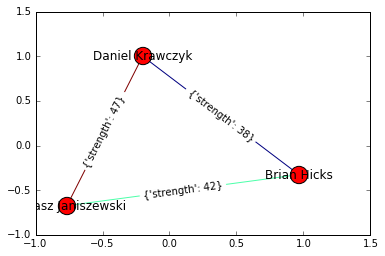

In [171]:
pos=nx.spring_layout(G)
edgewidth = [ d['strength'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edge_labels(G, pos)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G, pos, edge_color=edgewidth)



In [179]:
nx.k_nearest_neighbors(G, weight='strength')

{2: 2.0}

In [178]:
nx.pagerank(G, weight='strength')

{'Brian Hicks': 0.31693061243932524,
 'Daniel Krawczyk': 0.3344486194845959,
 'Tomasz Janiszewski': 0.34862076807607845}